## Adding weights to edges

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import pause
from matplotlib.colors import Normalize
import numpy as np
import pylab

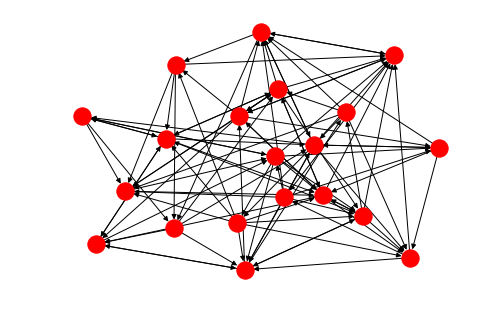

In [2]:
er = nx.erdos_renyi_graph(directed=True, n=20, p=np.random.rand(1)[0])

nx.draw(er)
plt.show()

In [3]:
for u,v,a in er.edges(data=True):
    a['weight'] = 2*np.random.rand(1)[0] - 1

for i, n in er.nodes(data = True):
    n['decision'] = 2*np.random.rand(1)[0]-1

In [4]:
A = nx.adjacency_matrix(er)
D = np.diag(np.asarray(np.sum(nx.adjacency_matrix(er), axis=1)).reshape(-1))
L = D - A

In [5]:
dt = 0.005
N = nx.number_of_nodes(er)
n_iter = 1000
x = np.zeros((n_iter, N))
# for saddle node
# x[0] = 0.85 - np.random.rand(N)/100

# transcritical
x[0] = np.random.rand(N)

In [6]:
for iter in np.arange(0,n_iter-1):
    dxdt = -L.dot(x[iter])
    x[iter+1] = x[iter] + dxdt*dt

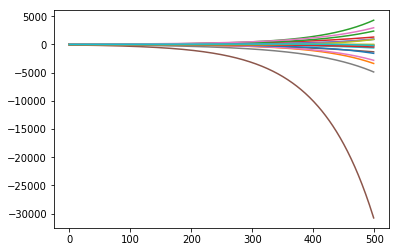

In [7]:
#plt.figure(figsize=(10, 30))
for i in np.arange(N):
    #plt.subplot(N, 2, i+1)
    plt.plot(x[500:,i])
plt.show()

In [8]:
np.linalg.matrix_rank(D-A)

19

In [9]:
x[999,:]

array([ 8.86725850e+02, -3.38122448e+03,  4.27716202e+03,  1.29869462e+03,
       -2.75782718e+02, -1.31388933e+03, -2.81885210e+03, -6.01512435e+01,
       -1.07276921e-01, -6.23144708e+02, -1.58746806e+03, -2.19815495e+02,
        2.35959257e+03, -4.58978168e+02,  9.69687011e+02, -3.07433062e+04,
        2.94237918e+03, -4.88473666e+03,  8.86127766e+02, -1.97589448e+02])

In [10]:
u, s, v = np.linalg.svd(D-A)
print(s)

[3.43978590e+00 3.10330133e+00 2.86899321e+00 2.71821402e+00
 2.28531951e+00 2.14859382e+00 1.89611476e+00 1.78373888e+00
 1.69046284e+00 1.37758434e+00 1.28269443e+00 1.08144533e+00
 1.00764175e+00 8.60999704e-01 6.10460601e-01 5.63016003e-01
 3.74127885e-01 2.52419445e-01 1.39427420e-01 2.20668385e-17]
